# T>C percentage (=labeled fraction) 

In [1]:
# notebook cleaned 2021/03/02
# avg.tc.pct is the mean percentage of TC labeled miRNAs

In [2]:
library(tidyverse)
library(ggplot2)
library(gplots)
library(cowplot)

library(broom)
library(minpack.lm)
library(nlsr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [3]:
options(stringsAsFactors = FALSE)
rm(list = ls())

In [4]:
col_shgfp <- "gray30"
col_sh1 <- '#9E0142'
col_sh3 <- '#E55649'
col_sh6 <- '#FDAE61'
col_sh7 <- '#FEE08B'
col_sh11 <- '#3288BD'
col_drosha <- "#66C2A5"
col_wt <- '#60258a'
col_eq <- '#4957A4'

In [5]:
# file provided in Shiekhattarlab/miRNApaper/s4U_figures
# look at same 126 miRNAs as in sh11 s4U

toMatch <- read.delim("126_final_miRNA_analyzed_inputReadsNorm.txt")
head(toMatch)

toMatch <- toMatch$V1
head(toMatch)



,V1
,<chr>
1,miR-25-3p
2,let-7i-5p
3,let-7d-5p
4,miR-93-5p
5,miR-191-5p
6,miR-17-5p


[1] "miR-25-3p"  "let-7i-5p"  "let-7d-5p"  "miR-93-5p"  "miR-191-5p"
[6] "miR-17-5p"

# RIP of Ago2 in shGFP, shINTS6 and shINTS11 

In [7]:
# comparison of normalization methods:

# The ath-miR-159a spike does not make a major difference, although I may just put it in order to calm down eventual reviewers.


In [7]:
# files provided in Shiekhattarlab/miRNApaper/s4U_AGO_RIP_figures


timecourse.gfp <- read.delim("timecourse_rip_gfp_for_heatmap_accumulation_plot.tsv")
timecourse.6 <- read.delim("timecourse_rip_sh6_for_heatmap_accumulation_plot.tsv")
timecourse.11 <- read.delim("timecourse_rip_sh11_for_heatmap_accumulation_plot.tsv")


In [8]:
# add control 24h timepoint

control.gfp <- read.delim("control_rip_gfp_for_heatmap_accumulation_plot.tsv")
control.6 <- read.delim("control_rip_sh6_for_heatmap_accumulation_plot.tsv")
control.11 <- read.delim("control_rip_sh11_for_heatmap_accumulation_plot.tsv")


In [10]:
head(timecourse.gfp)

	

,flybase_id,duplex,arm.name,start.pos,mir.type,UCount,seed,time,totalReads,average.ppm,avg.tc.pct,avg.tc.ppm
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr19:13947380-13947473,miR-23a,miR-23a-3p,45,mature,3,ATCACATT,0,11668.209,10013.787,0.04243961,4.249813
2,chr19:13947380-13947473,miR-23a,miR-23a-3p,45,mature,3,ATCACATT,24,8359.365,10013.787,4.18739445,419.316764
3,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,6,CATTGCAC,0,5752.583,6121.555,0.07329480,4.486781
4,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,6,CATTGCAC,24,6490.526,6121.555,3.95373705,242.030170
5,chr22:46509565-46509668,let-7b,let-7b-5p,6,mature,6,TGAGGTAG,0,4361.683,5067.844,0.07601264,3.852202
6,chr22:46509565-46509668,let-7b,let-7b-5p,6,mature,6,TGAGGTAG,24,5774.005,5067.844,1.78168749,90.293147


# plot total reads [RPM]

In [11]:
# s4U
timecourse.gfp.total <-
    timecourse.gfp %>%
    mutate(sample = "shGFP") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))


head(timecourse.gfp.total)
nrow(timecourse.gfp.total)


timecourse.6.total <-
    timecourse.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(timecourse.6.total)



timecourse.11.total <-
    timecourse.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(timecourse.11.total)



,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,shGFP,miR-23a,miR-23a-3p,11668.209,8359.365
2,shGFP,miR-25,miR-25-3p,5752.583,6490.526
3,shGFP,let-7b,let-7b-5p,4361.683,5774.005
4,shGFP,miR-191,miR-191-5p,3108.556,2416.466
5,shGFP,miR-21,miR-21-5p,2744.971,2080.085
6,shGFP,miR-224,miR-224-5p,1567.115,1617.929


[1] 203

[1] 208

[1] 206

In [12]:
# no s4U control
control.gfp.total <-
    control.gfp %>%
    mutate(sample = "shGFP") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))


head(control.gfp.total)
nrow(control.gfp.total)

control.6.total <-
    control.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(control.6.total)


control.11.total <-
    control.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(average.ppm, avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(control.11.total)



,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,shGFP,miR-23a,miR-23a-3p,11668.209,10129.751
2,shGFP,miR-25,miR-25-3p,5752.583,5777.397
3,shGFP,let-7b,let-7b-5p,4361.683,3610.953
4,shGFP,miR-191,miR-191-5p,3108.556,2858.922
5,shGFP,miR-21,miR-21-5p,2744.971,2642.354
6,shGFP,miR-93,miR-93-5p,1555.689,1637.512


[1] 209

[1] 208

[1] 205

In [13]:
# do I still have duplicated entries?
# this table should be empty - actually, it is not because there are miRNAs with different precursors. Those I see here!
armname <- timecourse.11.total[duplicated(timecourse.11.total$arm.name),3]

timecourse.11.total[grep(paste0(armname, collapse = "|"), timecourse.11.total$arm.name),]

,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
123,shINTS11,miR-24,miR-24-3p,11.6095378,14.2063581
160,shINTS11,miR-24,miR-24-3p,2.9276226,5.5316793
189,shINTS11,miR-16,miR-16-5p,0.3028575,1.0057599
190,shINTS11,miR-194,miR-194-5p,0.5047625,0.6285999
192,shINTS11,let-7a,let-7a-3p,0.3028575,0.2514400
194,shINTS11,let-7a,let-7a-3p,0.3028575,0.6285999
195,shINTS11,miR-16,miR-16-5p,0.4038100,0.5028799
200,shINTS11,miR-194,miR-194-5p,0.1009525,0.3771600


In [14]:

time.gfp.total <- as.data.frame(timecourse.gfp.total[,-c(1,2)]) # remove sample name and miR duplex
head(time.gfp.total)
nrow(time.gfp.total)


time.6.total <- as.data.frame(timecourse.6.total[,-c(1,2)])
#head(time.6.total)
nrow(time.6.total)



time.11.total <- as.data.frame(timecourse.11.total[,-c(1,2)])
#head(time.11.total)
nrow(time.11.total)



,arm.name,0,24
,<chr>,<dbl>,<dbl>
1,miR-23a-3p,11668.209,8359.365
2,miR-25-3p,5752.583,6490.526
3,let-7b-5p,4361.683,5774.005
4,miR-191-5p,3108.556,2416.466
5,miR-21-5p,2744.971,2080.085
6,miR-224-5p,1567.115,1617.929


[1] 203

[1] 208

[1] 206

In [15]:

ctrl.gfp.total <- as.data.frame(control.gfp.total[,-c(1,2)]) # remove sample name and miR duplex
head(ctrl.gfp.total)
nrow(ctrl.gfp.total)




ctrl.6.total <- as.data.frame(control.6.total[,-c(1,2)])
#head(ctrl.6.total)
nrow(ctrl.6.total)




ctrl.11.total <- as.data.frame(control.11.total[,-c(1,2)])
#head(ctrl.11.total)
nrow(ctrl.11.total)



,arm.name,0,24
,<chr>,<dbl>,<dbl>
1,miR-23a-3p,11668.209,10129.751
2,miR-25-3p,5752.583,5777.397
3,let-7b-5p,4361.683,3610.953
4,miR-191-5p,3108.556,2858.922
5,miR-21-5p,2744.971,2642.354
6,miR-93-5p,1555.689,1637.512


[1] 209

[1] 208

[1] 205

In [16]:
#head(time.gfp.total)
gfp <- reshape2::melt(time.gfp.total)
gfp$hela <- "shControl"
colnames(gfp) <- c("arm.name", "time", "RPM", "hela")
gfp$arm.name <- as.character(gfp$arm.name)
head(gfp)
nrow(gfp)




ints6 <- reshape2::melt(time.6.total)
ints6$hela <- "shINTS6"
colnames(ints6) <- c("arm.name", "time", "RPM", "hela")
ints6$arm.name <- as.character(ints6$arm.name)
#head(ints6)





ints11 <- reshape2::melt(time.11.total)
ints11$hela <- "shINTS11"
colnames(ints11) <- c("arm.name", "time", "RPM", "hela")
ints11$arm.name <- as.character(ints11$arm.name)
#head(ints11)




Using arm.name as id variables



,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,0,11668.209,shControl
2,miR-25-3p,0,5752.583,shControl
3,let-7b-5p,0,4361.683,shControl
4,miR-191-5p,0,3108.556,shControl
5,miR-21-5p,0,2744.971,shControl
6,miR-224-5p,0,1567.115,shControl


[1] 406

Using arm.name as id variables

Using arm.name as id variables



In [17]:
head(ctrl.gfp.total)
c.gfp <- reshape2::melt(ctrl.gfp.total)
c.gfp$hela <- "shControl"
colnames(c.gfp) <- c("arm.name", "time", "RPM", "hela")
c.gfp$arm.name <- as.character(c.gfp$arm.name)
#head(c.gfp)
nrow(c.gfp)




c.ints6 <- reshape2::melt(ctrl.6.total)
c.ints6$hela <- "shINTS6"
colnames(c.ints6) <- c("arm.name", "time", "RPM", "hela")
c.ints6$arm.name <- as.character(c.ints6$arm.name)
#head(c.ints6)






c.ints11 <- reshape2::melt(ctrl.11.total)
c.ints11$hela <- "shINTS11"
colnames(c.ints11) <- c("arm.name", "time", "RPM", "hela")
c.ints11$arm.name <- as.character(c.ints11$arm.name)
#head(c.ints11)




,arm.name,0,24
,<chr>,<dbl>,<dbl>
1,miR-23a-3p,11668.209,10129.751
2,miR-25-3p,5752.583,5777.397
3,let-7b-5p,4361.683,3610.953
4,miR-191-5p,3108.556,2858.922
5,miR-21-5p,2744.971,2642.354
6,miR-93-5p,1555.689,1637.512


Using arm.name as id variables



[1] 418

Using arm.name as id variables

Using arm.name as id variables



In [18]:
fin <- rbind.data.frame(gfp,  ints6,  ints11)
fin <- fin[complete.cases(fin),]

head(fin)

,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,0,11668.209,shControl
2,miR-25-3p,0,5752.583,shControl
3,let-7b-5p,0,4361.683,shControl
4,miR-191-5p,0,3108.556,shControl
5,miR-21-5p,0,2744.971,shControl
6,miR-224-5p,0,1567.115,shControl


In [19]:
fin.c <- rbind.data.frame(c.gfp,  c.ints6,  c.ints11)
fin.c <- fin.c[complete.cases(fin.c),]

In [22]:
# timecourse
# look at the same miRNAs as in s4U experiment

match.gfp.total <- time.gfp.total[grepl(paste0(toMatch, collapse = "|"),time.gfp.total$arm.name),-2] 
match.6.total <- time.6.total[match(match.gfp.total$arm.name,time.6.total$arm.name),-2] 
match.11.total <- time.11.total[match(match.gfp.total$arm.name,time.11.total$arm.name),-2] 

head(match.gfp.total)
nrow(match.gfp.total)

nrow(match.6.total)

nrow(match.11.total)


,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,8359.365
2,miR-25-3p,6490.526
3,let-7b-5p,5774.005
4,miR-191-5p,2416.466
5,miR-21-5p,2080.085
6,miR-224-5p,1617.929


[1] 122

[1] 122

[1] 122

In [23]:
# control - same rownames as timecourse
c.match.gfp.total <- ctrl.gfp.total[match(match.gfp.total$arm.name,ctrl.gfp.total$arm.name),-2] 
c.match.6.total <- ctrl.6.total[match(c.match.gfp.total$arm.name,ctrl.6.total$arm.name),-2] 
c.match.11.total <- ctrl.11.total[match(c.match.gfp.total$arm.name,ctrl.11.total$arm.name),-2] 

head(c.match.gfp.total)
nrow(c.match.gfp.total)

nrow(c.match.6.total)
nrow(c.match.11.total)


,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,10129.751
2,miR-25-3p,5777.397
3,let-7b-5p,3610.953
4,miR-191-5p,2858.922
5,miR-21-5p,2642.354
8,miR-224-5p,1416.334


[1] 122

[1] 122

[1] 122

In [25]:
# timecourse
head(match.gfp.total)
gfp <- reshape2::melt(match.gfp.total)
gfp$hela <- "shControl"
colnames(gfp) <- c("arm.name", "time", "RPM", "hela")
gfp$arm.name <- as.character(gfp$arm.name)
head(gfp)




ints6 <- reshape2::melt(match.6.total)
ints6$hela <- "shINTS6"
colnames(ints6) <- c("arm.name", "time", "RPM", "hela")
ints6$arm.name <- as.character(ints6$arm.name)
#head(ints6)





ints11 <- reshape2::melt(match.11.total)
ints11$hela <- "shINTS11"
colnames(ints11) <- c("arm.name", "time", "RPM", "hela")
ints11$arm.name <- as.character(ints11$arm.name)
#head(ints11)



,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,8359.365
2,miR-25-3p,6490.526
3,let-7b-5p,5774.005
4,miR-191-5p,2416.466
5,miR-21-5p,2080.085
6,miR-224-5p,1617.929


Using arm.name as id variables



,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,8359.365,shControl
2,miR-25-3p,24,6490.526,shControl
3,let-7b-5p,24,5774.005,shControl
4,miR-191-5p,24,2416.466,shControl
5,miR-21-5p,24,2080.085,shControl
6,miR-224-5p,24,1617.929,shControl


Using arm.name as id variables

Using arm.name as id variables



In [26]:
# control
head(c.match.gfp.total)
c.gfp <- reshape2::melt(c.match.gfp.total)
c.gfp$hela <- "shControl"
colnames(c.gfp) <- c("arm.name", "time", "RPM", "hela")
c.gfp$arm.name <- as.character(c.gfp$arm.name)
head(c.gfp)





c.ints6 <- reshape2::melt(c.match.6.total)
c.ints6$hela <- "shINTS6"
colnames(c.ints6) <- c("arm.name", "time", "RPM", "hela")
c.ints6$arm.name <- as.character(c.ints6$arm.name)
#head(c.ints6)




c.ints11 <- reshape2::melt(c.match.11.total)
c.ints11$hela <- "shINTS11"
colnames(c.ints11) <- c("arm.name", "time", "RPM", "hela")
c.ints11$arm.name <- as.character(c.ints11$arm.name)
#head(ints11)




,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,10129.751
2,miR-25-3p,5777.397
3,let-7b-5p,3610.953
4,miR-191-5p,2858.922
5,miR-21-5p,2642.354
8,miR-224-5p,1416.334


Using arm.name as id variables



,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,10129.751,shControl
2,miR-25-3p,24,5777.397,shControl
3,let-7b-5p,24,3610.953,shControl
4,miR-191-5p,24,2858.922,shControl
5,miR-21-5p,24,2642.354,shControl
6,miR-224-5p,24,1416.334,shControl


Using arm.name as id variables

Using arm.name as id variables



In [27]:
fin <- rbind.data.frame(gfp,  ints6,  ints11)
nrow(fin)
fin <- fin[complete.cases(fin),]
nrow(fin)

head(fin)

[1] 366

[1] 366

,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,8359.365,shControl
2,miR-25-3p,24,6490.526,shControl
3,let-7b-5p,24,5774.005,shControl
4,miR-191-5p,24,2416.466,shControl
5,miR-21-5p,24,2080.085,shControl
6,miR-224-5p,24,1617.929,shControl


In [28]:
fin.c <- rbind.data.frame(c.gfp,  c.ints6,  c.ints11)
nrow(fin.c)
fin.c <- fin.c[complete.cases(fin.c),]
nrow(fin.c)

head(fin.c)

[1] 366

[1] 365

,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,10129.751,shControl
2,miR-25-3p,24,5777.397,shControl
3,let-7b-5p,24,3610.953,shControl
4,miR-191-5p,24,2858.922,shControl
5,miR-21-5p,24,2642.354,shControl
6,miR-224-5p,24,1416.334,shControl


notch went outside hinges. Try setting notch=FALSE.



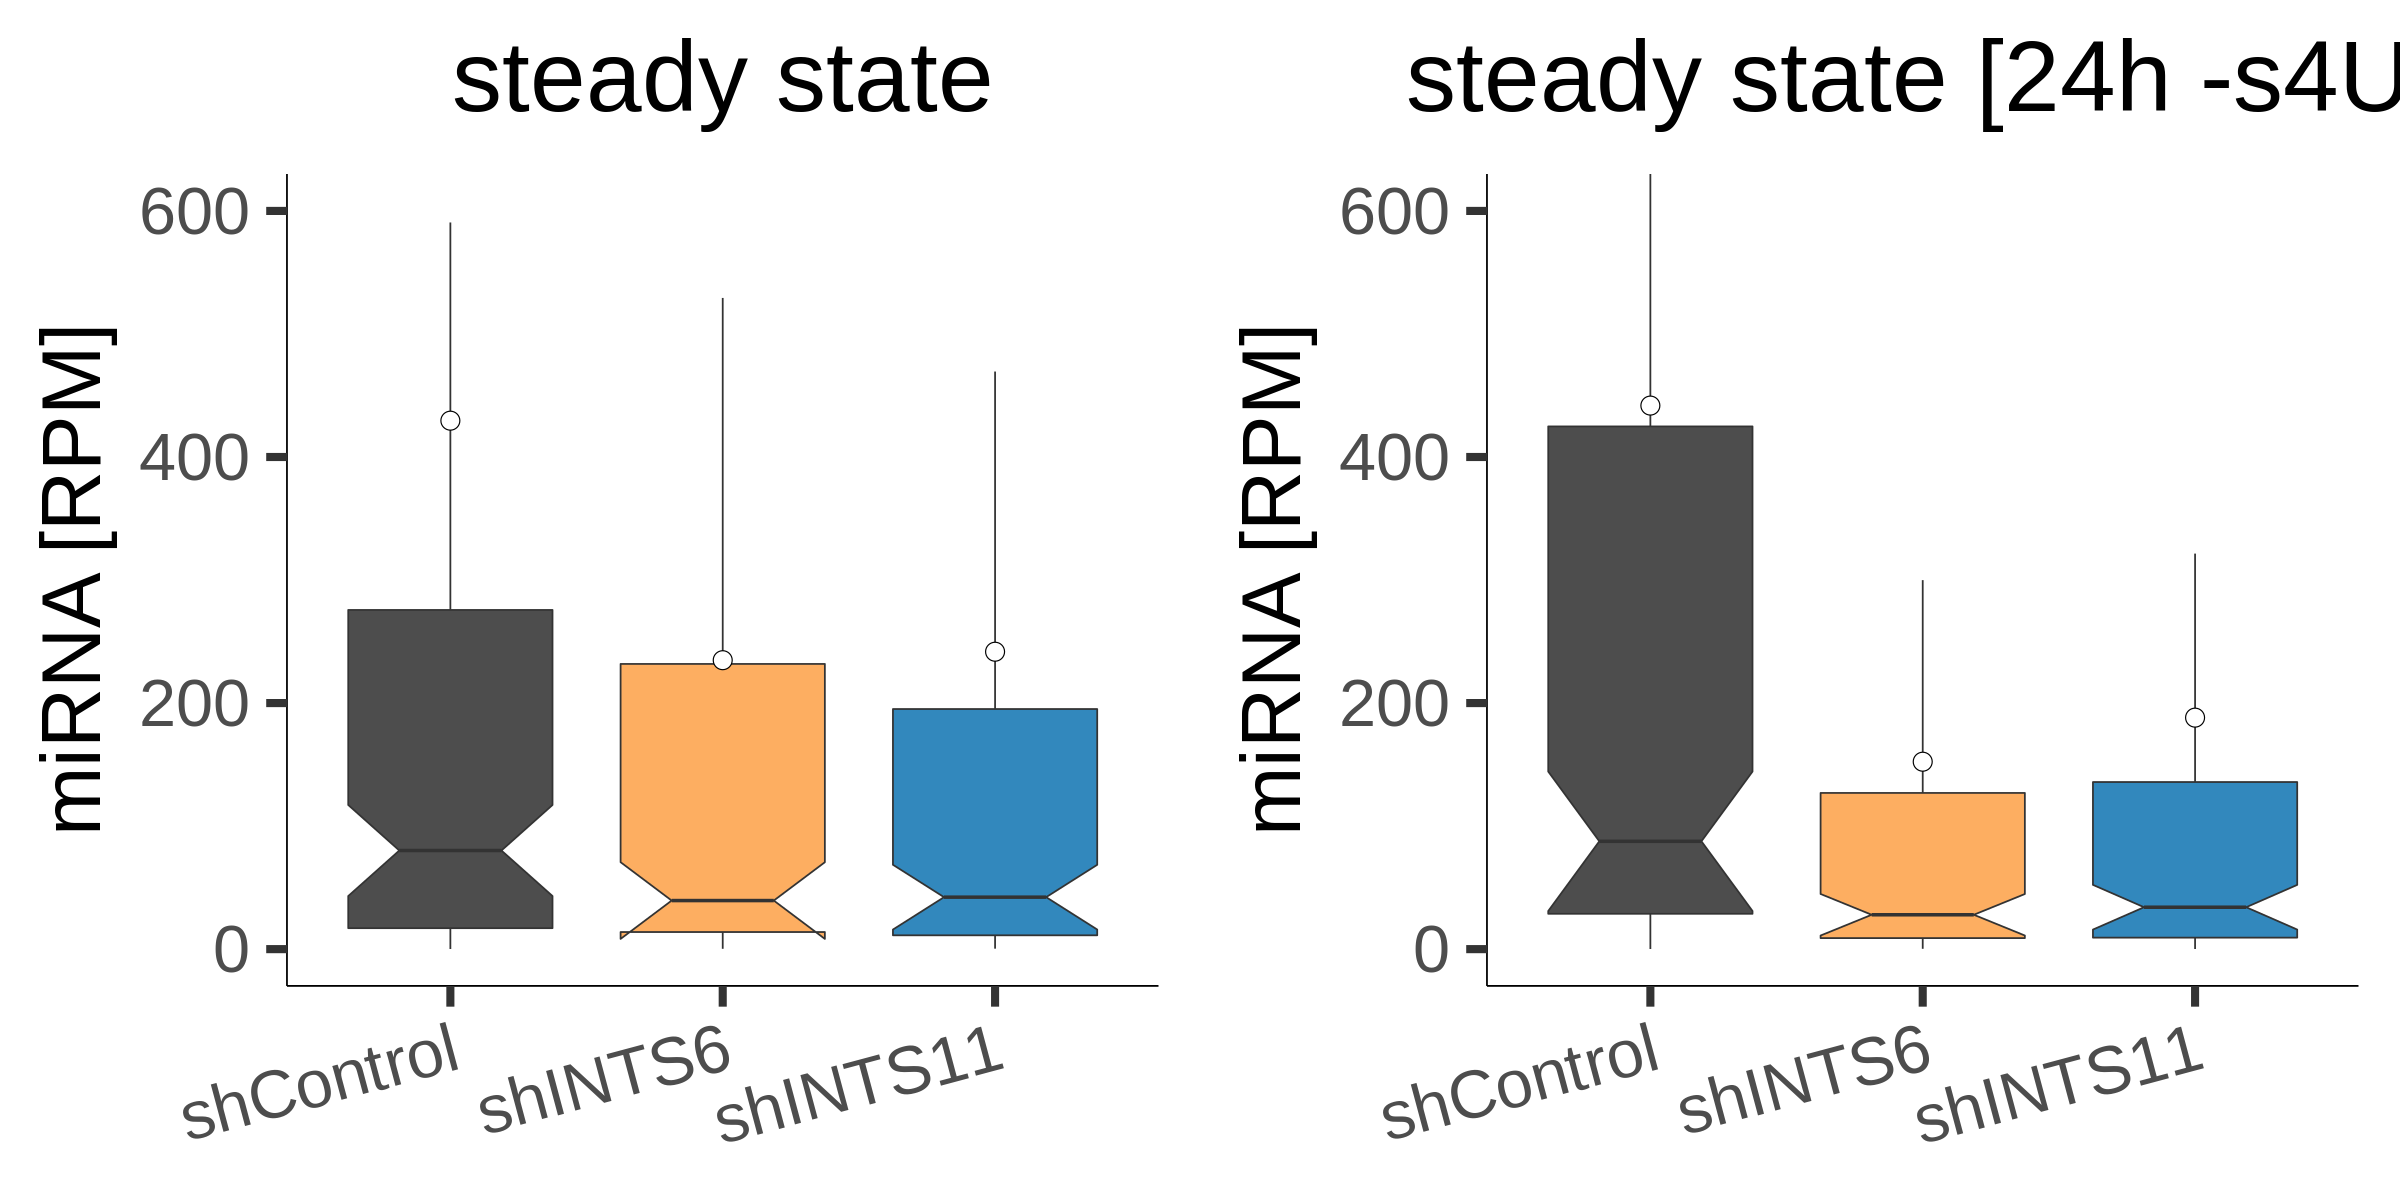

In [29]:
options(repr.plot.width=20, repr.plot.height=10)

box <- ggplot(fin, aes(x=hela, y=RPM, fill=hela)) + 
    theme_bw(base_size = 50) +
    ggtitle("steady state") +
    theme(plot.title = element_text(hjust = '0.5')) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
    theme(legend.position="none", legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent"))+
    #scale_y_continuous(trans = 'log2', breaks=c(1, 16,64, 256))+
    coord_cartesian(ylim=c(0.1, 600)) +
    ylab("miRNA [RPM]")  +
    scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
    geom_boxplot(notch=TRUE,outlier.shape=NA, aes(hela, RPM)) +
    scale_fill_manual(values=c(col_shgfp,  col_sh6,  col_sh11), 
                limits=c("shControl", "shINTS6", "shINTS11"))+
    #geom_dotplot(binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.2, alpha=0.2)+
    stat_summary(fun=mean, colour="black", fill="white", geom="point", 
                     shape=21, size=5,show.legend = FALSE)



box.c <- ggplot(fin.c, aes(x=hela, y=RPM, fill=hela)) + 
    theme_bw(base_size = 50) +
    ggtitle("steady state [24h -s4U]") +
    theme(plot.title = element_text(hjust = '0.5')) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
    theme(legend.position="none", legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent"))+
    #scale_y_continuous(trans = 'log2', breaks=c(1, 16,64, 256))+
    coord_cartesian(ylim=c(0.1, 600)) +
    ylab("miRNA [RPM]")  +
    scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
    geom_boxplot(notch=TRUE,outlier.shape=NA, aes(hela, RPM)) +
    scale_fill_manual(values=c(col_shgfp,  col_sh6, col_sh11), 
                limits=c("shControl", "shINTS6", "shINTS11"))+
    #geom_dotplot(binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.2, alpha=0.2)+
    stat_summary(fun=mean, colour="black", fill="white", geom="point", 
                     shape=21, size=5,show.legend = FALSE)

plot_grid(box, box.c, ncol=2)

In [30]:
head(fin)

,arm.name,time,RPM,hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,8359.365,shControl
2,miR-25-3p,24,6490.526,shControl
3,let-7b-5p,24,5774.005,shControl
4,miR-191-5p,24,2416.466,shControl
5,miR-21-5p,24,2080.085,shControl
6,miR-224-5p,24,1617.929,shControl


In [31]:
# Compute the analysis of variance
res.aov <- aov(RPM ~ hela, data = fin)
# Summary of the analysis
summary(res.aov)

TukeyHSD(res.aov)

             Df    Sum Sq Mean Sq F value Pr(>F)
hela          2   2977354 1488677   2.182  0.114
Residuals   363 247692609  682349               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = RPM ~ hela, data = fin)

$hela
                          diff       lwr       upr     p adj
shINTS11-shControl -187.788519 -436.6903  61.11329 0.1792717
shINTS6-shControl  -194.683218 -443.5850  54.21859 0.1578829
shINTS6-shINTS11     -6.894699 -255.7965 242.00711 0.9976598


### plot as histogram

In [32]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
##   http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)/#Helper functions
##   
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
        library(plyr)
        
        # New version of length which can handle NA's: if na.rm==T, don't count them
        length2 <- function (x, na.rm=FALSE) {
                if (na.rm) sum(!is.na(x))
                else       length(x)
        }
        
        # This does the summary. For each group's data frame, return a vector with
        # N, mean, and sd
        datac <- ddply(data, groupvars, .drop=.drop,
                       .fun = function(xx, col) {
                               c(N    = length2(xx[[col]], na.rm=na.rm),
                                 mean = mean   (xx[[col]], na.rm=na.rm),
                                 sd   = sd     (xx[[col]], na.rm=na.rm)
                               )
                       },
                       measurevar
        )
        
        # Rename the "mean" column    
        datac <- rename(datac, c("mean" = measurevar))
        
        datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
        
        # Confidence interval multiplier for standard error
        # Calculate t-statistic for confidence interval: 
        # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
        ciMult <- qt(conf.interval/2 + .5, datac$N-1)
        datac$ci <- datac$se * ciMult
        
        return(datac)
}



In [33]:
hist <- summarySE(fin, measurevar="RPM", groupvars=c("hela"))
hist.c <- summarySE(fin.c, measurevar="RPM", groupvars=c("hela"))

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




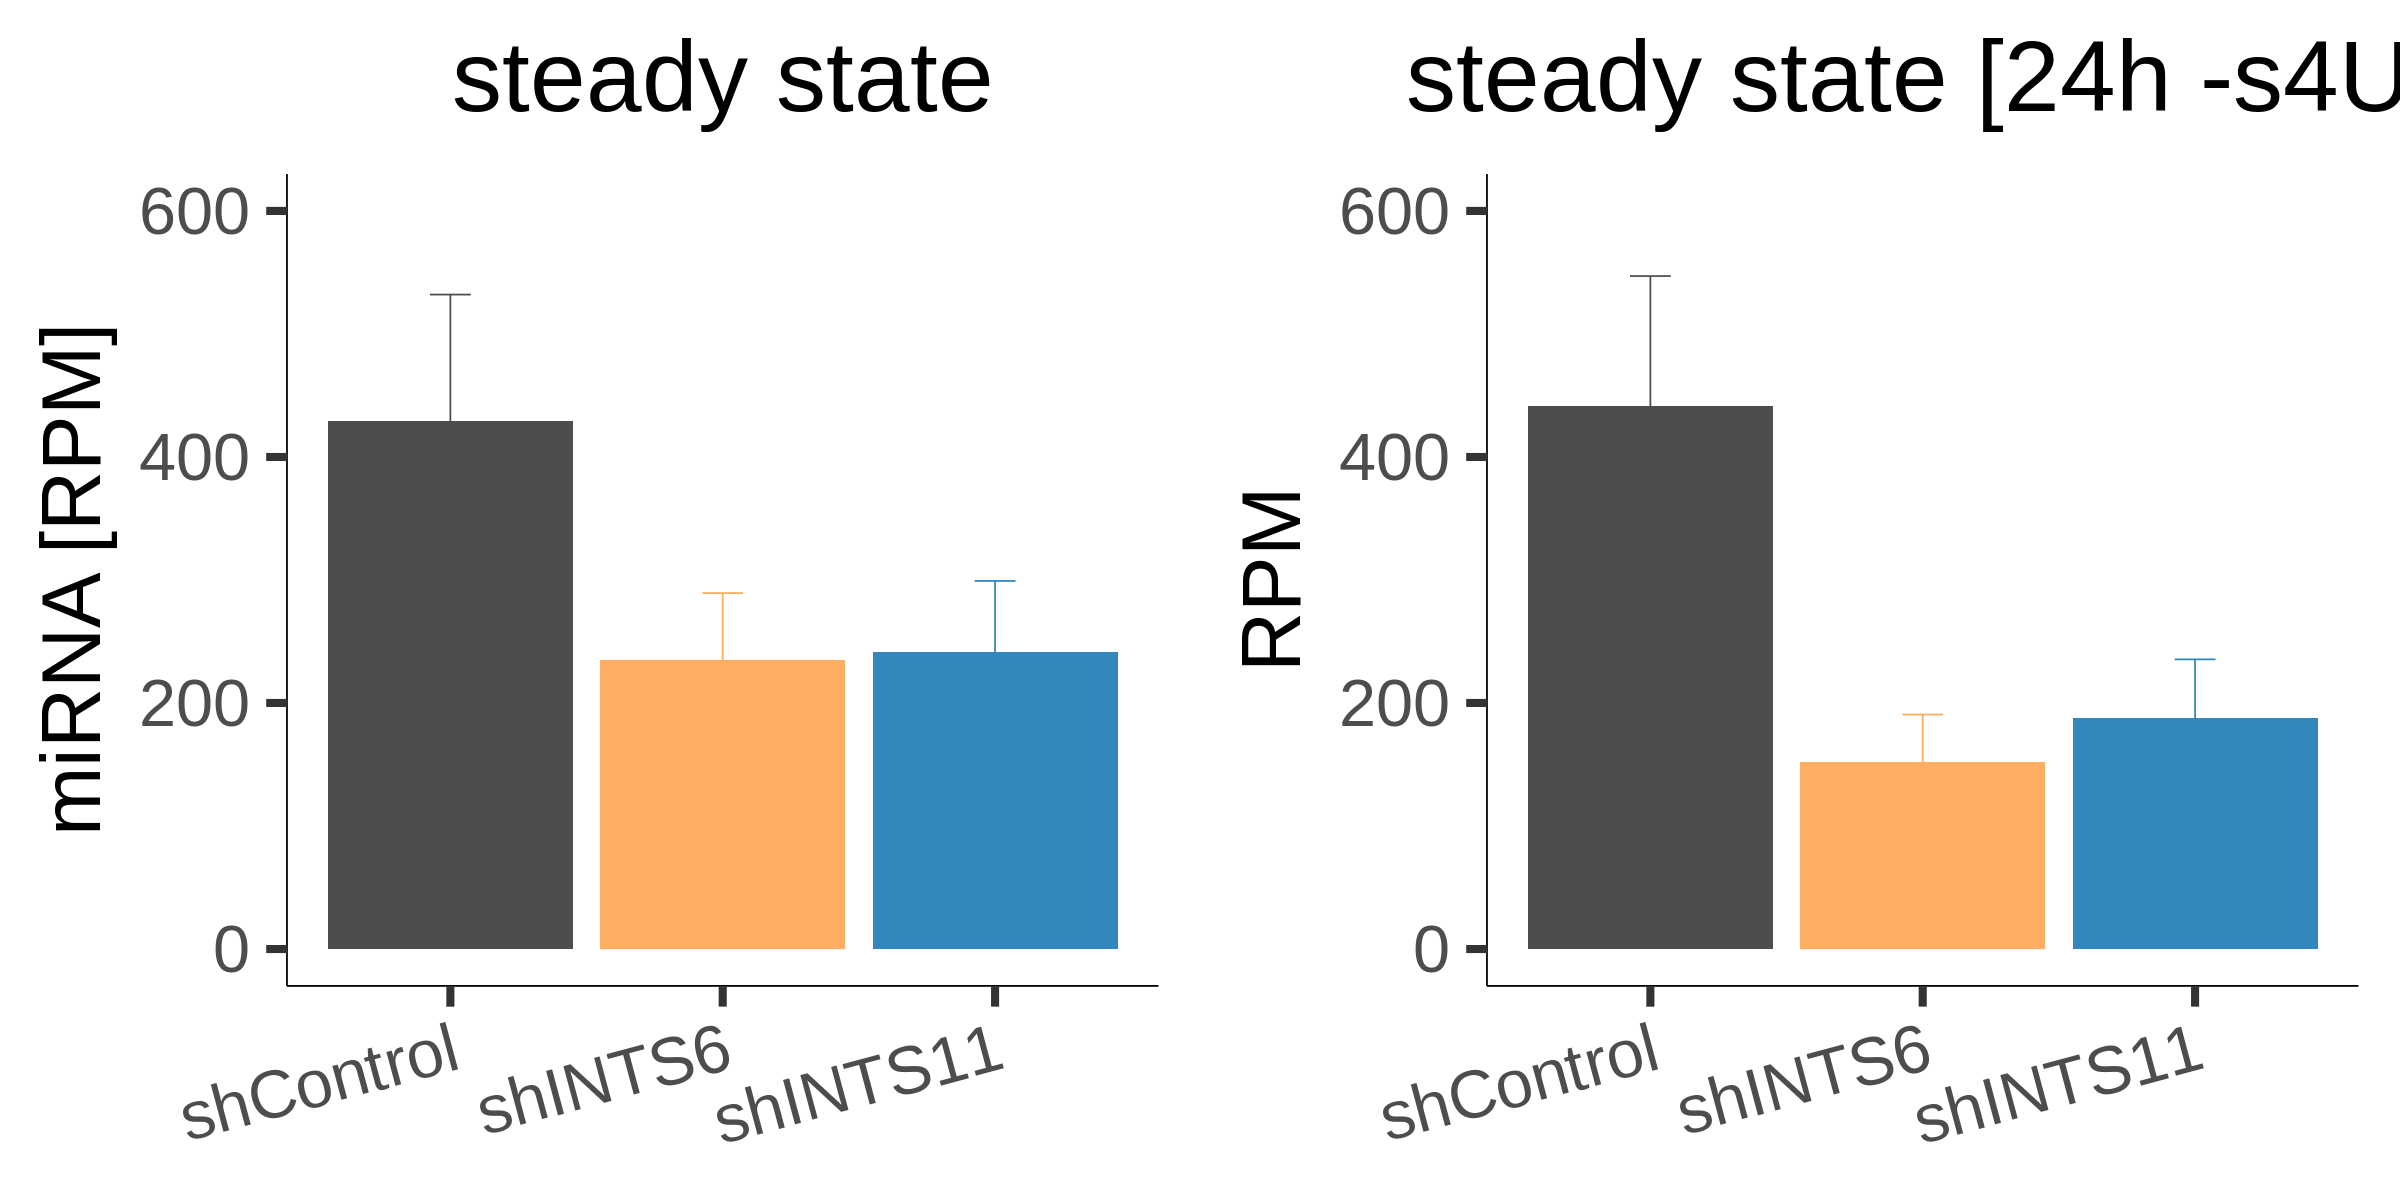

In [34]:
options(repr.plot.width=20, repr.plot.height=10)

h <- ggplot(data = hist, aes(x = hela, y=RPM)) +
        theme_bw(base_size = 50) +
        ggtitle("steady state") +
        theme(plot.title = element_text(hjust = '0.5')) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
        coord_cartesian(ylim=c(0, 600)) +
        #xlab("s4U labeling time [h]")+
        ylab("miRNA [RPM]")+
        scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
        geom_col(fill=c(col_shgfp,  col_sh11,  col_sh6)) +
        geom_errorbar(width=.15, aes(ymin=RPM-se, ymax=RPM+se), color=c(col_shgfp,   col_sh11, col_sh6))  
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time <=1,], lty=3, color=col_shgfp)+
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time >=1 & gfp.mature$time <= limit,], lty=5, color=col_shgfp) 

hc <- ggplot(data = hist.c, aes(x = hela, y=RPM)) +
        theme_bw(base_size = 50) +
        ggtitle("steady state [24h -s4U]") +
        theme(plot.title = element_text(hjust = '0.5')) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
        coord_cartesian(ylim=c(0, 600)) +
        #xlab("s4U labeling time [h]")+
        #ylab("T>C miRNA [RPM]")+
        scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
        geom_col(fill=c(col_shgfp,  col_sh11,  col_sh6)) +
        geom_errorbar(width=.15, aes(ymin=RPM-se, ymax=RPM+se), color=c(col_shgfp,  col_sh11,  col_sh6))  


plot_grid(h, hc, ncol=2)

# plot T>C reads [%]

In [35]:
timecourse.gfp.tc <-
    timecourse.gfp %>%
    mutate(sample = "shGFP") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))


head(timecourse.gfp.tc)
nrow(timecourse.gfp.tc)


timecourse.6.tc <-
    timecourse.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(timecourse.6.tc)



timecourse.11.tc <-
    timecourse.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(timecourse.11.tc)



,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,shGFP,miR-23a,miR-23a-3p,0.04243961,4.187394
2,shGFP,miR-25,miR-25-3p,0.07329480,3.953737
3,shGFP,let-7b,let-7b-5p,0.07601264,1.781687
4,shGFP,miR-191,miR-191-5p,0.34194693,3.180324
5,shGFP,miR-21,miR-21-5p,0.08609213,5.854990
6,shGFP,miR-224,miR-224-5p,0.05543669,5.474275


[1] 203

[1] 208

[1] 206

In [36]:
# control
control.gfp.tc <-
    control.gfp %>%
    mutate(sample = "shGFP") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))


head(control.gfp.tc)
nrow(control.gfp.tc)


control.6.tc <-
    control.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(control.6.tc)



control.11.tc <-
    control.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(totalReads, average.ppm, avg.tc.ppm)) %>%
    spread(time, avg.tc.pct) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

nrow(control.11.tc)



,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,shGFP,miR-23a,miR-23a-3p,0.04243961,0.04430178
2,shGFP,miR-25,miR-25-3p,0.07329480,0.07747053
3,shGFP,let-7b,let-7b-5p,0.07601264,0.08300693
4,shGFP,miR-191,miR-191-5p,0.34194693,0.34969738
5,shGFP,miR-21,miR-21-5p,0.08609213,0.07062436
6,shGFP,miR-93,miR-93-5p,0.06252878,0.04559418


[1] 209

[1] 208

[1] 205

In [37]:
# timecourse

time.gfp.tc <- as.data.frame(timecourse.gfp.tc[,-c(1,2)]) # remove sample name and miR duplex
#rownames(time.gfp.tc) <- time.gfp.tc$arm.name
#time.gfp.tc <- as.matrix(time.gfp.tc[,-1]) # remove arm.name
time.gfp.tc <- cbind.data.frame(time.gfp.tc$arm.name, (time.gfp.tc[2:3]-time.gfp.tc[,2])) #normalize ppm by timepoint 0
time.gfp.tc[time.gfp.tc<0] <- 0
colnames(time.gfp.tc)[1] <- "arm.name"
head(time.gfp.tc)
nrow(time.gfp.tc)




time.6.tc <- as.data.frame(timecourse.6.tc[,-c(1,2)])
#rownames(time.6.tc) <- time.6.tc$arm.name
#time.6.tc <- as.matrix(time.6.tc[,-1])
time.6.tc <- cbind.data.frame(time.6.tc$arm.name, (time.6.tc[2:3]-time.6.tc[,2])) #normalize ppm by timepoint 0
time.6.tc[time.6.tc<0] <- 0
colnames(time.6.tc)[1] <- "arm.name"
#head(time.6.tc)
nrow(time.6.tc)




time.11.tc <- as.data.frame(timecourse.11.tc[,-c(1,2)])
#rownames(time.11.tc) <- time.11.tc$arm.name
#time.11.tc <- as.matrix(time.11.tc[,-1])
time.11.tc <- cbind.data.frame(time.11.tc$arm.name, (time.11.tc[2:3]-time.11.tc[,2])) #normalize ppm by timepoint 0
time.11.tc[time.11.tc<0] <- 0
colnames(time.11.tc)[1] <- "arm.name"
#head(time.11.tc)
nrow(time.11.tc)



,arm.name,0,24
,<chr>,<dbl>,<dbl>
1,miR-23a-3p,0,4.144955
2,miR-25-3p,0,3.880442
3,let-7b-5p,0,1.705675
4,miR-191-5p,0,2.838377
5,miR-21-5p,0,5.768897
6,miR-224-5p,0,5.418838


[1] 203

[1] 208

[1] 206

In [38]:
head(control.gfp.tc)

,sample,duplex,arm.name,0,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,shGFP,miR-23a,miR-23a-3p,0.04243961,0.04430178
2,shGFP,miR-25,miR-25-3p,0.07329480,0.07747053
3,shGFP,let-7b,let-7b-5p,0.07601264,0.08300693
4,shGFP,miR-191,miR-191-5p,0.34194693,0.34969738
5,shGFP,miR-21,miR-21-5p,0.08609213,0.07062436
6,shGFP,miR-93,miR-93-5p,0.06252878,0.04559418


In [39]:
# control

ctrl.gfp.tc <- as.data.frame(control.gfp.tc[,-c(1,2)]) # remove sample name and miR duplex
#rownames(ctrl.gfp.tc) <- ctrl.gfp.tc$arm.name
#ctrl.gfp.tc <- as.matrix(ctrl.gfp.tc[,-1]) # remove arm.name
ctrl.gfp.tc <- cbind.data.frame(ctrl.gfp.tc$arm.name, (ctrl.gfp.tc[2:3]-ctrl.gfp.tc[,2])) #normalize ppm by timepoint 0
ctrl.gfp.tc[ctrl.gfp.tc<0] <- 0
colnames(ctrl.gfp.tc)[1] <- "arm.name"
head(ctrl.gfp.tc)
nrow(ctrl.gfp.tc)




ctrl.6.tc <- as.data.frame(control.6.tc[,-c(1,2)])
#rownames(ctrl.6.tc) <- ctrl.6.tc$arm.name
#ctrl.6.tc <- as.matrix(ctrl.6.tc[,-1])
ctrl.6.tc <- cbind.data.frame(ctrl.6.tc$arm.name, (ctrl.6.tc[2:3]-ctrl.6.tc[,2])) #normalize ppm by timepoint 0
ctrl.6.tc[ctrl.6.tc<0] <- 0
colnames(ctrl.6.tc)[1] <- "arm.name"
#head(ctrl.6.tc)
nrow(ctrl.6.tc)




ctrl.11.tc <- as.data.frame(control.11.tc[,-c(1,2)])
#rownames(ctrl.11.tc) <- ctrl.11.tc$arm.name
#ctrl.11.tc <- as.matrix(ctrl.11.tc[,-1])
ctrl.11.tc <- cbind.data.frame(ctrl.11.tc$arm.name, (ctrl.11.tc[2:3]-ctrl.11.tc[,2])) #normalize ppm by timepoint 0
ctrl.11.tc[ctrl.11.tc<0] <- 0
colnames(ctrl.11.tc)[1] <- "arm.name"
#head(ctrl.11.tc)
nrow(ctrl.11.tc)



,arm.name,0,24
,<chr>,<dbl>,<dbl>
1,miR-23a-3p,0,0.001862165
2,miR-25-3p,0,0.004175733
3,let-7b-5p,0,0.006994288
4,miR-191-5p,0,0.007750444
5,miR-21-5p,0,0.000000000
6,miR-93-5p,0,0.000000000


[1] 209

[1] 208

[1] 205

In [40]:
#toMatch <- rownames(time.gfp.tc)
head(toMatch)
length(toMatch)

[1] "miR-25-3p"  "let-7i-5p"  "let-7d-5p"  "miR-93-5p"  "miR-191-5p"
[6] "miR-17-5p"

[1] 126

In [41]:
# timecourse
match.gfp.tc <- time.gfp.tc[grepl(paste0(toMatch, collapse = "|"),time.gfp.tc$arm.name),-2] 
match.6.tc <- time.6.tc[match(match.gfp.tc$arm.name,time.6.tc$arm.name),-2] 
match.11.tc <- time.11.tc[match(match.gfp.tc$arm.name,time.11.tc$arm.name),-2] 

head(match.gfp.tc)


,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,4.144955
2,miR-25-3p,3.880442
3,let-7b-5p,1.705675
4,miR-191-5p,2.838377
5,miR-21-5p,5.768897
6,miR-224-5p,5.418838


In [42]:
# timecourse
c.match.gfp.tc <- ctrl.gfp.tc[match(match.gfp.tc$arm.name,ctrl.gfp.tc$arm.name),-2] 
c.match.6.tc <- ctrl.6.tc[match(c.match.gfp.tc$arm.name,ctrl.6.tc$arm.name),-2] 
c.match.11.tc <- ctrl.11.tc[match(c.match.gfp.tc$arm.name,ctrl.11.tc$arm.name),-2] 

head(c.match.gfp.tc)
nrow(c.match.gfp.tc)

,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,0.001862165
2,miR-25-3p,0.004175733
3,let-7b-5p,0.006994288
4,miR-191-5p,0.007750444
5,miR-21-5p,0.000000000
8,miR-224-5p,0.004832467


[1] 122

In [43]:
head(match.gfp.tc)
gfp <- reshape2::melt(match.gfp.tc)
gfp$hela <- "shControl"
colnames(gfp) <- c("arm.name", "time", "T>C [%]", "hela")
gfp$arm.name <- as.character(gfp$arm.name)
head(gfp)





ints6 <- reshape2::melt(match.6.tc)
ints6$hela <- "shINTS6"
colnames(ints6) <- c("arm.name", "time", "T>C [%]", "hela")
ints6$arm.name <- as.character(ints6$arm.name)
#head(ints6)




ints11 <- reshape2::melt(match.11.tc)
ints11$hela <- "shINTS11"
colnames(ints11) <- c("arm.name", "time", "T>C [%]", "hela")
ints11$arm.name <- as.character(ints11$arm.name)
#head(ints11)




,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,4.144955
2,miR-25-3p,3.880442
3,let-7b-5p,1.705675
4,miR-191-5p,2.838377
5,miR-21-5p,5.768897
6,miR-224-5p,5.418838


Using arm.name as id variables



,arm.name,time,T>C [%],hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,4.144955,shControl
2,miR-25-3p,24,3.880442,shControl
3,let-7b-5p,24,1.705675,shControl
4,miR-191-5p,24,2.838377,shControl
5,miR-21-5p,24,5.768897,shControl
6,miR-224-5p,24,5.418838,shControl


Using arm.name as id variables

Using arm.name as id variables



In [44]:
head(c.match.gfp.tc)
c.gfp <- reshape2::melt(c.match.gfp.tc)
c.gfp$hela <- "shControl"
colnames(c.gfp) <- c("arm.name", "time", "T>C [%]", "hela")
c.gfp$arm.name <- as.character(c.gfp$arm.name)
head(c.gfp)
nrow(c.gfp)




c.ints6 <- reshape2::melt(c.match.6.tc)
c.ints6$hela <- "shINTS6"
colnames(c.ints6) <- c("arm.name", "time", "T>C [%]", "hela")
c.ints6$arm.name <- as.character(c.ints6$arm.name)
#head(ints6)





c.ints11 <- reshape2::melt(c.match.11.tc)
c.ints11$hela <- "shINTS11"
colnames(c.ints11) <- c("arm.name", "time", "T>C [%]", "hela")
c.ints11$arm.name <- as.character(c.ints11$arm.name)
#head(ints11)



,arm.name,24
,<chr>,<dbl>
1,miR-23a-3p,0.001862165
2,miR-25-3p,0.004175733
3,let-7b-5p,0.006994288
4,miR-191-5p,0.007750444
5,miR-21-5p,0.000000000
8,miR-224-5p,0.004832467


Using arm.name as id variables



,arm.name,time,T>C [%],hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,0.001862165,shControl
2,miR-25-3p,24,0.004175733,shControl
3,let-7b-5p,24,0.006994288,shControl
4,miR-191-5p,24,0.007750444,shControl
5,miR-21-5p,24,0.000000000,shControl
6,miR-224-5p,24,0.004832467,shControl


[1] 122

Using arm.name as id variables

Using arm.name as id variables



In [45]:
# timecourse
fin <- rbind.data.frame(gfp,  ints6,  ints11)
nrow(fin)
fin <- fin[complete.cases(fin),]
nrow(fin)
head(fin)

[1] 366

[1] 366

,arm.name,time,T>C [%],hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,4.144955,shControl
2,miR-25-3p,24,3.880442,shControl
3,let-7b-5p,24,1.705675,shControl
4,miR-191-5p,24,2.838377,shControl
5,miR-21-5p,24,5.768897,shControl
6,miR-224-5p,24,5.418838,shControl


In [46]:
# control
fin.c <- rbind.data.frame(c.gfp,  c.ints6,  c.ints11)
nrow(fin.c)
fin.c <- fin.c[complete.cases(fin.c),]
nrow(fin.c)
head(fin.c)

[1] 366

[1] 365

,arm.name,time,T>C [%],hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,0.001862165,shControl
2,miR-25-3p,24,0.004175733,shControl
3,let-7b-5p,24,0.006994288,shControl
4,miR-191-5p,24,0.007750444,shControl
5,miR-21-5p,24,0.000000000,shControl
6,miR-224-5p,24,0.004832467,shControl


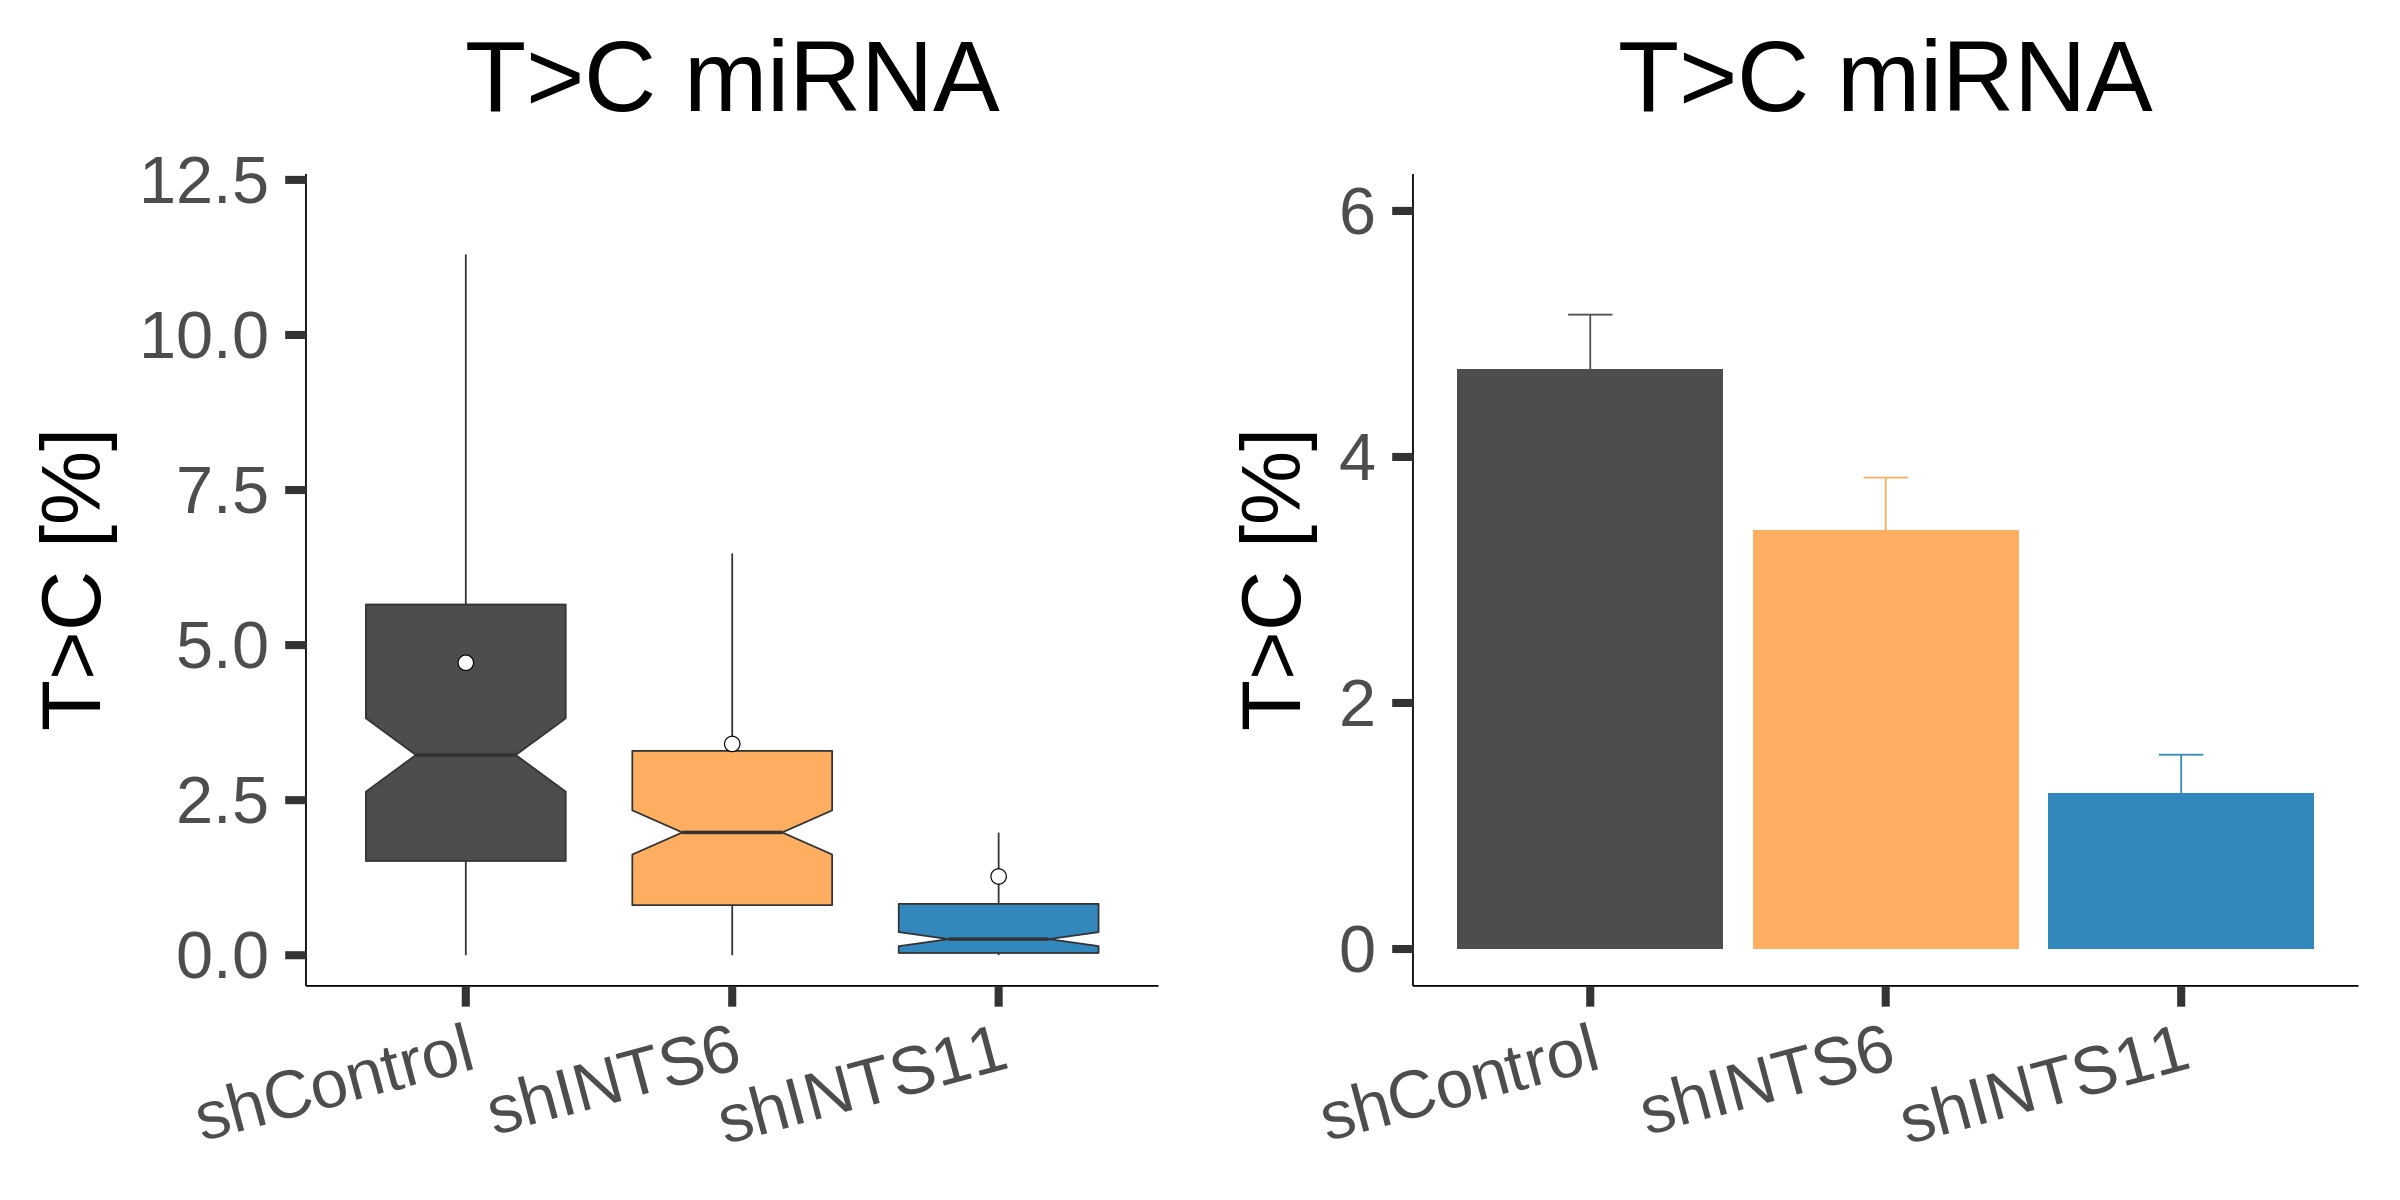

In [47]:
box <- ggplot(fin, aes(x=hela, y=`T>C [%]`, fill=hela)) + 
    theme_bw(base_size = 50) +
    ggtitle("T>C miRNA") +
    theme(plot.title = element_text(hjust = '0.5')) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
    theme(legend.position="none", legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent"))+
    #scale_y_continuous(trans = 'log10', breaks=c(0.01, 0.1, 1,10))+
    coord_cartesian(ylim=c(0.1, 12)) +
    #ylab("miRNA half-life [h]")  +
    scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
    geom_boxplot(notch=TRUE,outlier.shape=NA, aes(hela, `T>C [%]`)) +
    scale_fill_manual(values=c(col_shgfp, col_sh6,  col_sh11), 
                limits=c("shControl", "shINTS6", "shINTS11"))+
    #geom_dotplot(binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.2, alpha=0.2)+
    stat_summary(fun=mean, colour="black", fill="white", geom="point", 
                     shape=21, size=4,show.legend = FALSE)


hist <- summarySE(fin, measurevar="T>C [%]", groupvars=c("hela"))
plot <- ggplot(data = hist, aes(x = hela, y=`T>C [%]`)) +
        theme_bw(base_size = 50) +
        ggtitle("T>C miRNA") +
        theme(plot.title = element_text(hjust = '0.5')) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
        coord_cartesian(ylim=c(0, 6)) +
        #xlab("s4U labeling time [h]")+
        #ylab("T>C miRNA [RPM]")+
        scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
        geom_col(fill=c(col_shgfp,  col_sh11, col_sh6)) +
        geom_errorbar(width=.15, aes(ymin=`T>C [%]`-se, ymax=`T>C [%]`+se), color=c( col_shgfp,  col_sh11, col_sh6))  
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time <=1,], lty=3, color=col_shgfp)+
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time >=1 & gfp.mature$time <= limit,], lty=5, color=col_shgfp) 


options(repr.plot.width=20, repr.plot.height=10)
plot_grid(box, plot, ncol=2)

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



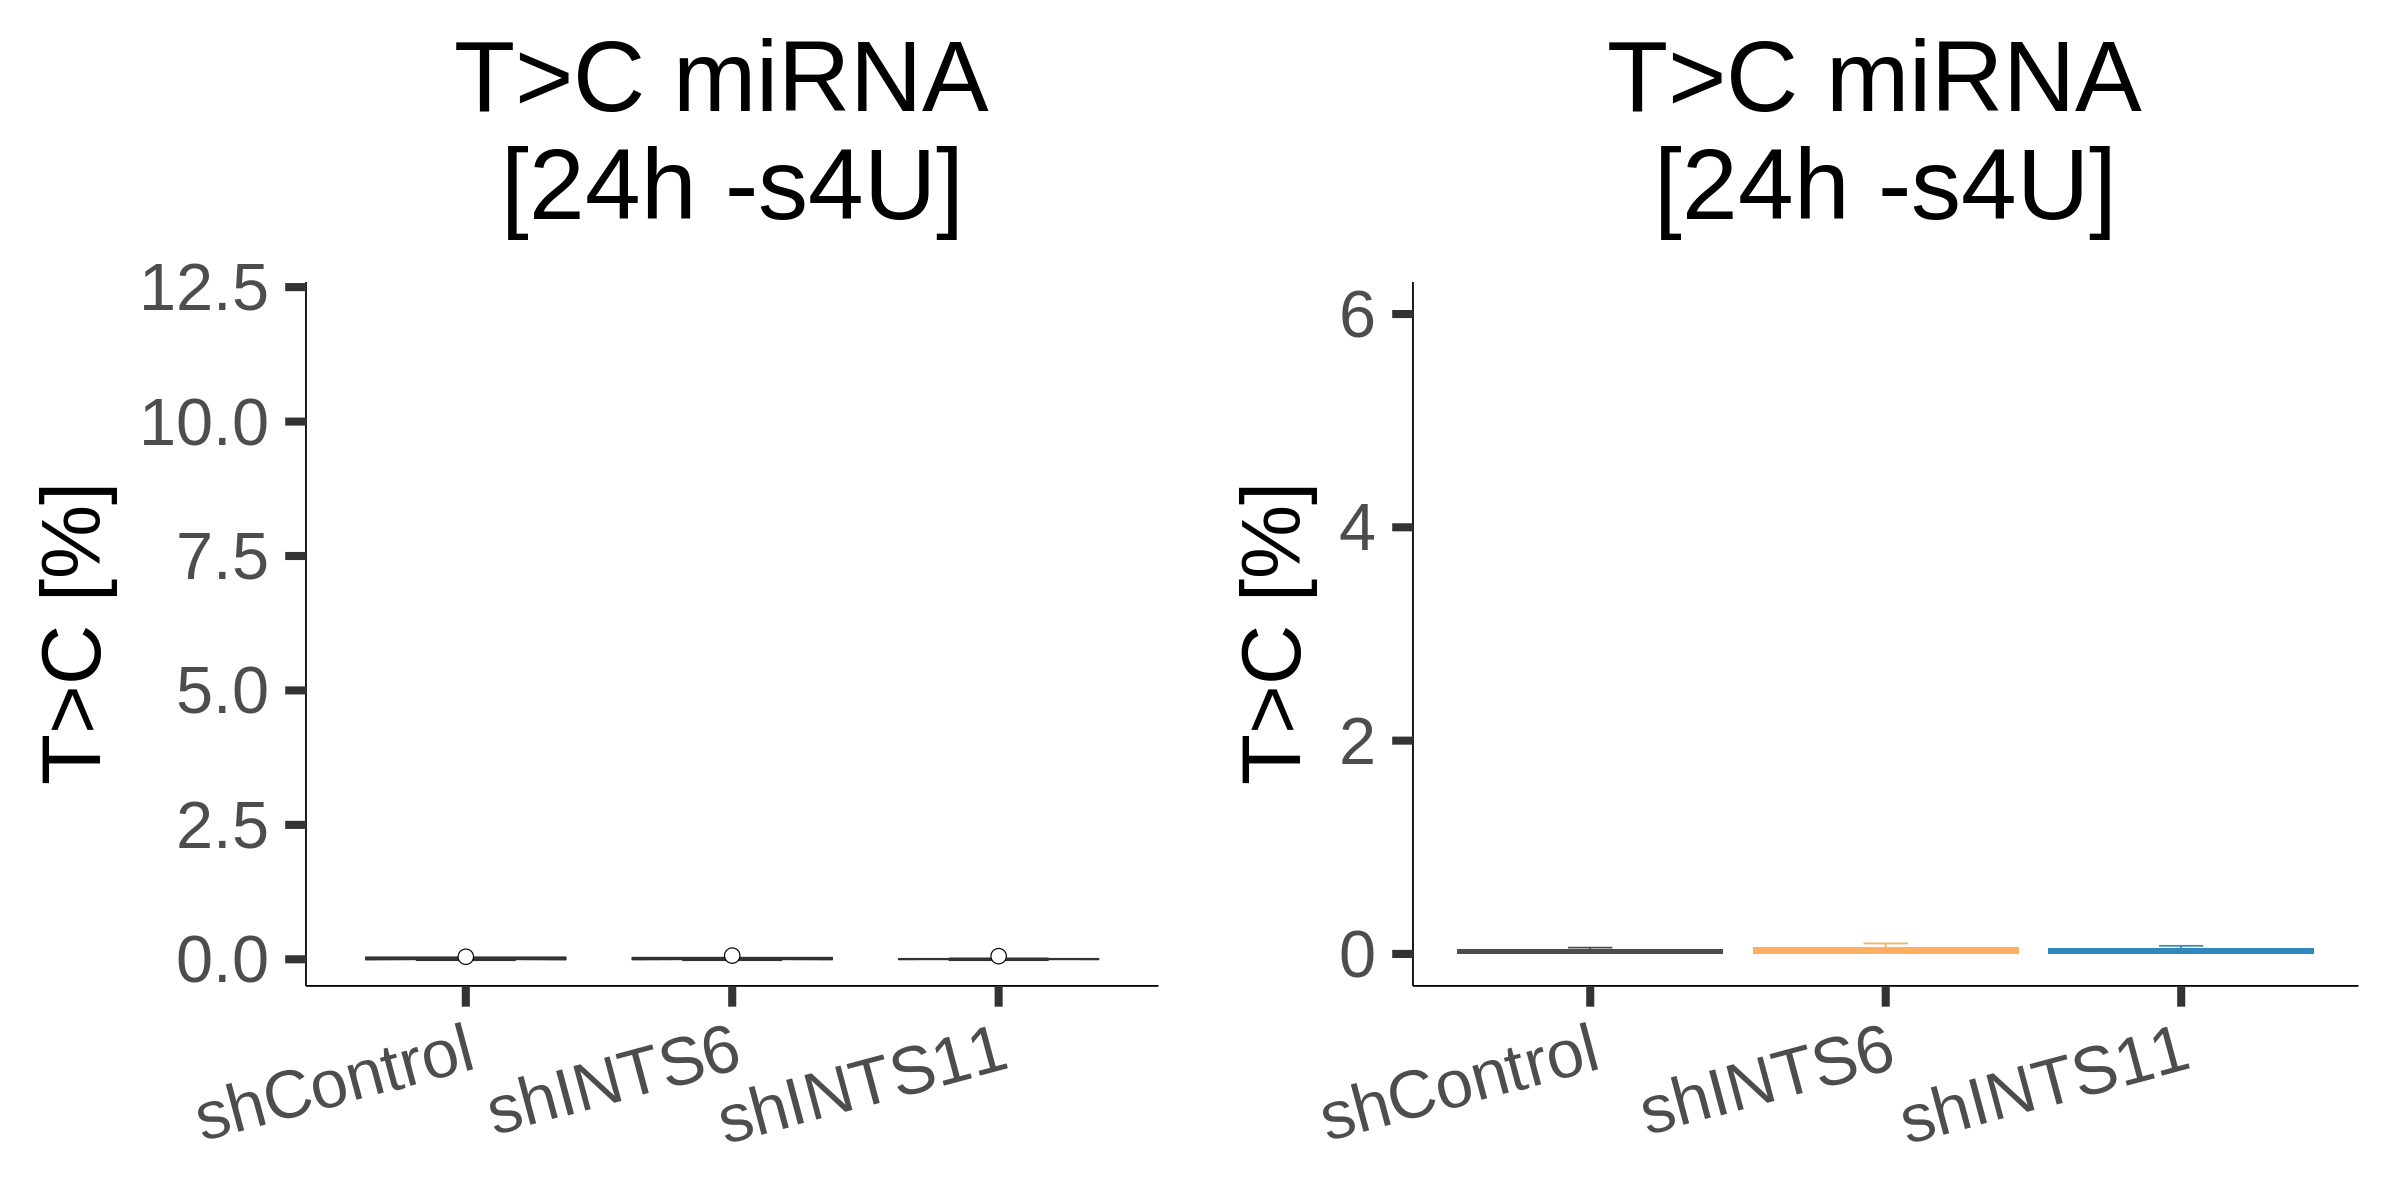

In [48]:
box <- ggplot(fin.c, aes(x=hela, y=`T>C [%]`, fill=hela)) + 
    theme_bw(base_size = 50) +
    ggtitle("T>C miRNA \n[24h -s4U]") +
    theme(plot.title = element_text(hjust = '0.5')) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
    theme(legend.position="none", legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent"))+
    #scale_y_continuous(trans = 'log10', breaks=c(0.01, 0.1, 1,10))+
    coord_cartesian(ylim=c(0.1, 12)) +
    #ylab("miRNA half-life [h]")  +
    scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
    geom_boxplot(notch=TRUE,outlier.shape=NA, aes(hela, `T>C [%]`)) +
    scale_fill_manual(values=c(col_shgfp, col_sh6,  col_sh11), 
               limits=c("shControl", "shINTS6", "shINTS11"))+
    #geom_dotplot(binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.2, alpha=0.2)+
    stat_summary(fun=mean, colour="black", fill="white", geom="point", 
                     shape=21, size=4,show.legend = FALSE)


hist <- summarySE(fin.c, measurevar="T>C [%]", groupvars=c("hela"))
plot <- ggplot(data = hist, aes(x = hela, y=`T>C [%]`)) +
        theme_bw(base_size = 50) +
        ggtitle("T>C miRNA \n[24h -s4U]") +
        theme(plot.title = element_text(hjust = '0.5')) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 15, vjust = 1, hjust=1)) +
        coord_cartesian(ylim=c(0, 6)) +
        #xlab("s4U labeling time [h]")+
        #ylab("T>C miRNA [RPM]")+
        scale_x_discrete(limits=c("shControl", "shINTS6", "shINTS11")) +
        geom_col(fill=c(col_shgfp,  col_sh11,  col_sh6)) +
        geom_errorbar(width=.15, aes(ymin=`T>C [%]`-se, ymax=`T>C [%]`+se), color=c(col_shgfp,  col_sh11,  col_sh6))  
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time <=1,], lty=3, color=col_shgfp)+
        #geom_smooth(se=FALSE, method="lm", data=gfp.mature[gfp.mature$time >=1 & gfp.mature$time <= limit,], lty=5, color=col_shgfp) 


options(repr.plot.width=20, repr.plot.height=10)
plot_grid(box, plot, ncol=2)

In [203]:
head(fin)

,arm.name,time,T>C [%],hela
,<chr>,<fct>,<dbl>,<chr>
1,miR-23a-3p,24,4.144955,shControl
2,miR-25-3p,24,3.880442,shControl
3,let-7b-5p,24,1.705675,shControl
4,miR-191-5p,24,2.838377,shControl
5,miR-21-5p,24,5.768897,shControl
6,miR-224-5p,24,5.418838,shControl


In [204]:
# Compute the analysis of variance
res.aov <- aov(`T>C [%]` ~ hela, data = fin)
# Summary of the analysis
summary(res.aov)

TukeyHSD(res.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
hela          2    738   369.1    19.2 1.19e-08 ***
Residuals   363   6978    19.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = `T>C [%]` ~ hela, data = fin)

$hela
                        diff        lwr        upr     p adj
shINTS11-shControl -3.445628 -4.7667218 -2.1245348 0.0000000
shINTS6-shControl  -1.308967 -2.6300605  0.0121265 0.0527624
shINTS6-shINTS11    2.136661  0.8155678  3.4577548 0.0004851


In [205]:
t.test(`T>C [%]` ~ hela, data = fin[-grep("shINTS11", fin$hela),])


	Welch Two Sample t-test

data:  T>C [%] by hela
t = 2.1331, df = 241.67, p-value = 0.03393
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1001634 2.5177707
sample estimates:
mean in group shControl   mean in group shINTS6 
               4.715089                3.406122 
